# Assignment 2: Edgar Lei

**Due Monday, Sep 28 2020 @ 11:55 pm**

Using the [SF Salaries Dataset](https://www.kaggle.com/kaggle/sf-salaries) from Kaggle! Complete the tasks below, submit your .ipynb file when done. Good luck!

**Import pandas:**

In [6]:
import pandas as pd

**Import Salaries.csv as a dataframe called ``sal``:**

In [7]:
sal = pd.read_csv('Salaries.csv')

**Check the first 6 rows of the DataFrame:**

In [ ]:
sal.head(6)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN


**Inspect with the ``.info()`` method:**

In [ ]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

In [ ]:
sal['BasePay'].mean()

66325.44884050643

**What is the highest amount of OvertimePay in the dataset ?**

In [ ]:
sal['OvertimePay'].max()

245131.88

**What is the job title of JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll)**

In [ ]:
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL'][['JobTitle']]

,JobTitle
24,"CAPTAIN, FIRE SUPPRESSION"


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [ ]:
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL'][['TotalPayBenefits']]

,TotalPayBenefits
24,270324.91


**What is the name of highest paid person (including benefits)?**

In [ ]:
sal.loc[sal['TotalPayBenefits'].idxmax()][['EmployeeName', 'TotalPayBenefits']]

EmployeeName        NATHANIEL FORD
TotalPayBenefits            567595
Name: 0, dtype: object

**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [ ]:
sal.loc[sal['TotalPayBenefits'].idxmin()]
# He is paid nothing (volunteer maybe?), and has a negative total pay.

Id                                      148654
EmployeeName                         Joe Lopez
JobTitle            Counselor, Log Cabin Ranch
BasePay                                      0
OvertimePay                                  0
OtherPay                               -618.13
Benefits                                     0
TotalPay                               -618.13
TotalPayBenefits                       -618.13
Year                                      2014
Notes                                      NaN
Agency                           San Francisco
Status                                     NaN
JobTitleStrLen                              26
Name: 148653, dtype: object

**What was the average BasePay of all employees per year? (2011-2014) ?**

In [ ]:
# overall mean
sal['BasePay'].mean()

66325.44884050213

In [ ]:
# mean for each year
sal.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

In [ ]:
sal['JobTitle'].nunique()

2159

**What are the top 5 most common jobs?**

In [ ]:
sal['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [ ]:
def one_person():
  count = 0
  titles2013 = sal[sal['Year'] == 2013]['JobTitle']
  for i in titles2013.value_counts():
    if i == 1:
      count += 1
    else:
      count += 0
  return count

one_person()

202

**How many people have the word Chief in their job title?**

In [ ]:
# if you mean the string 'Chief' (case sensitive)
def chief_title_v1():
  count = 0
  for i in sal['JobTitle']:
    if 'Chief' in i.split():
      count += 1
    else:
      count += 0
  return count

chief_title_v1()

319

In [ ]:
# if you mean the string 'chief' (not case sensitive)
def chief_title_v2():
  count = 0
  for i in sal['JobTitle']:
    if 'chief' in i.lower().split():
      count += 1
    else:
      count += 0
  return count

chief_title_v2()

477

**Is there a correlation between length of the Job Title string and Salary?**

In [15]:
# Salary -> BasePay
sal['JobTitleStrLen'] = sal['JobTitle'].str.len()

In [16]:
sal[['JobTitle', 'JobTitleStrLen', 'BasePay']]

,JobTitle,JobTitleStrLen,BasePay
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,46,167411.18
1,CAPTAIN III (POLICE DEPARTMENT),31,155966.02
2,CAPTAIN III (POLICE DEPARTMENT),31,212739.13
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,36,77916.00
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",44,134401.60
...,...,...,...
148649,Custodian,9,0.00
148650,Not provided,12,NaN
148651,Not provided,12,NaN
148652,Not provided,12,NaN


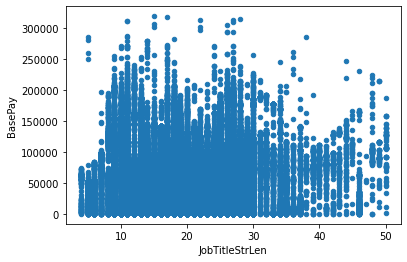

In [ ]:
sal.plot.scatter(x='JobTitleStrLen', y='BasePay')
# There appears to be little correlation between 
# the length of the Job Title string and the respective salary.

In [18]:
sal[['BasePay', 'JobTitleStrLen']].corr()

,BasePay,JobTitleStrLen
BasePay,1.000000,-0.005059
JobTitleStrLen,-0.005059,1.000000
